## Dataset Information


# Introduction

##### hey There this is kartik, i am learning data science as a 13 years old (2024) and this is a ML based project that i have made

# Utilizing Machine Learning for Beginners: Bigmart Sales Data Set

Retail is an industry that heavily relies on analytics to streamline various business processes. Tasks such as optimizing product placement, managing inventory, tailoring offers, and bundling products are efficiently handled through data science techniques. This dataset specifically encompasses transaction records from a sales store, presenting a regression problem with 8523 rows of 12 variables.

Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.


## Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Loading the dataset

In [3]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the dataset

In [7]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

In [11]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

C:\Users\User\AppData\Local\Temp\ipykernel_7352\191033451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i] = np.mean(df['Item_Weight'])
C:\Users\User\AppData\Local\Temp\ipykernel_7352\191033451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i] = np.mean(df['Item_Weight'])
C:\Users\User\AppData\Local\Temp\ipykernel_7352\191033451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_

C:\Users\User\AppData\Local\Temp\ipykernel_7352\191033451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i] = np.mean(df['Item_Weight'])
C:\Users\User\AppData\Local\Temp\ipykernel_7352\191033451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i] = np.mean(df['Item_Weight'])
C:\Users\User\AppData\Local\Temp\ipykernel_7352\191033451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_

In [14]:
df['Item_Weight'].isnull().sum()

0

In [15]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
df['Outlet_Size'].isnull().sum()

0

In [18]:
sum(df['Item_Visibility']==0)

526

In [19]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [20]:
sum(df['Item_Visibility']==0)

0

In [21]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Creation of New Attributes

In [22]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [23]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [24]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [25]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [26]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## Exploratory Data Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_7352\1001071604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

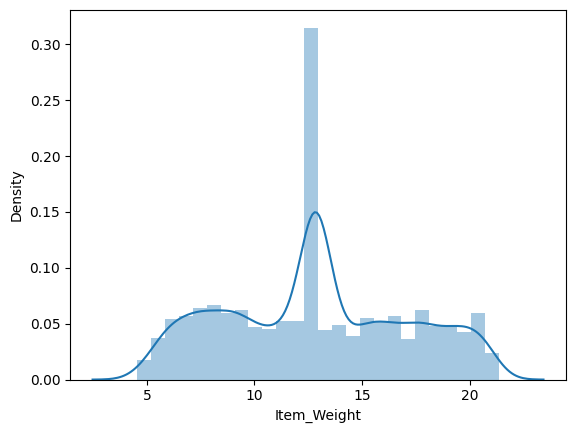

In [28]:
sns.distplot(df['Item_Weight'])

C:\Users\User\AppData\Local\Temp\ipykernel_7352\852521860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

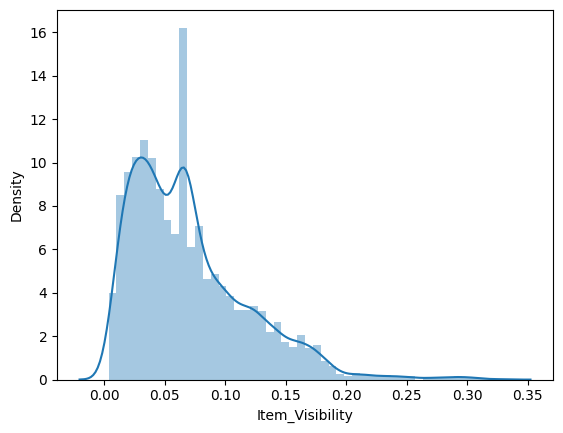

In [29]:
sns.distplot(df['Item_Visibility'])

C:\Users\User\AppData\Local\Temp\ipykernel_7352\3329567677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

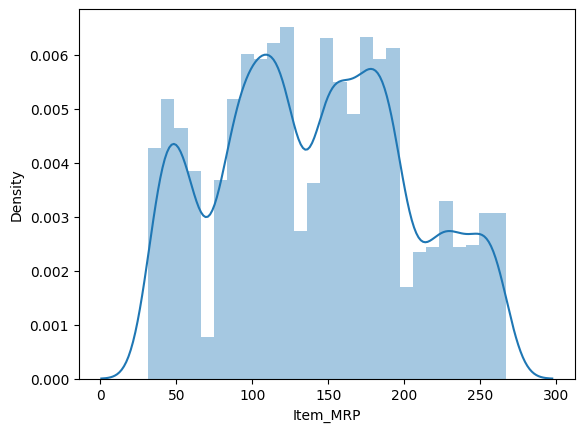

In [30]:
sns.distplot(df['Item_MRP'])

C:\Users\User\AppData\Local\Temp\ipykernel_7352\1265494514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

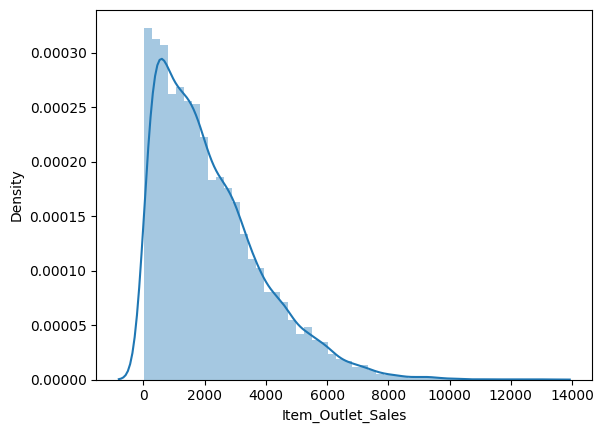

In [31]:
sns.distplot(df['Item_Outlet_Sales'])

In [32]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

C:\Users\User\AppData\Local\Temp\ipykernel_7352\1265494514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

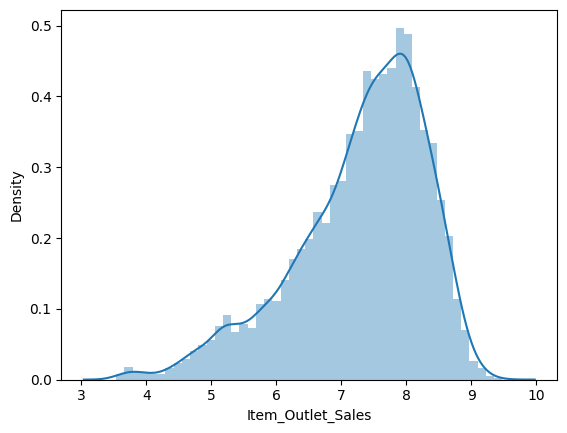

In [33]:
sns.distplot(df['Item_Outlet_Sales'])

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

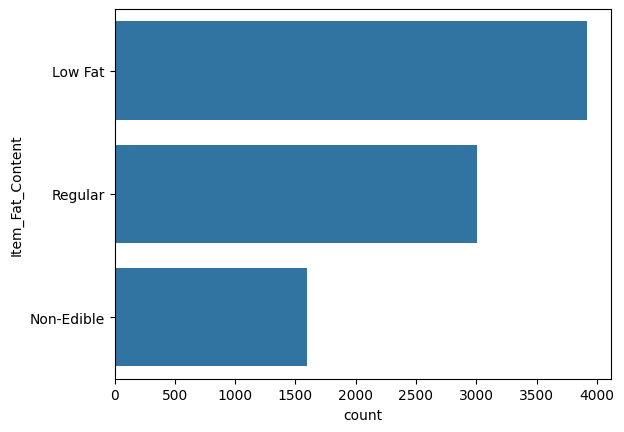

In [34]:
sns.countplot(df["Item_Fat_Content"])

C:\Users\User\AppData\Local\Temp\ipykernel_7352\3991077836.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(labels=l, rotation=90)


[Text(0.0, 0, 'Dairy'),
 Text(200.0, 0, 'Soft Drinks'),
 Text(400.0, 0, 'Meat'),
 Text(600.0, 0, 'Fruits and Vegetables'),
 Text(800.0, 0, 'Household'),
 Text(1000.0, 0, 'Baking Goods'),
 Text(1200.0, 0, 'Snack Foods'),
 Text(1400.0, 0, 'Frozen Foods')]

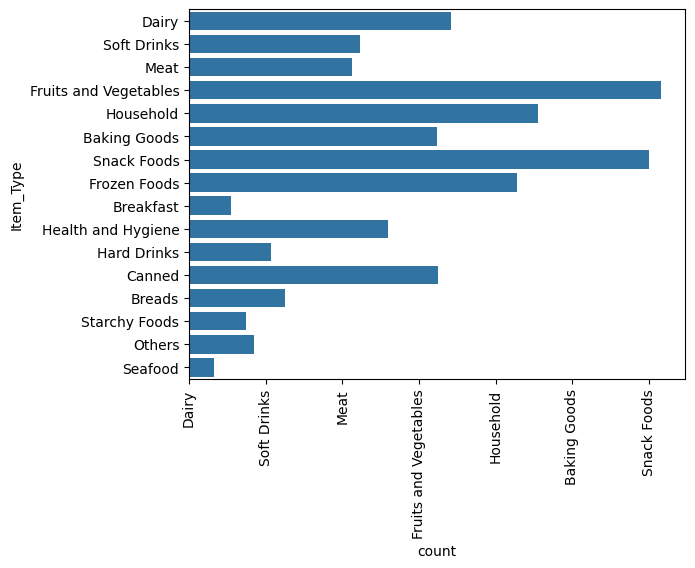

In [35]:
# plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<Axes: ylabel='count'>

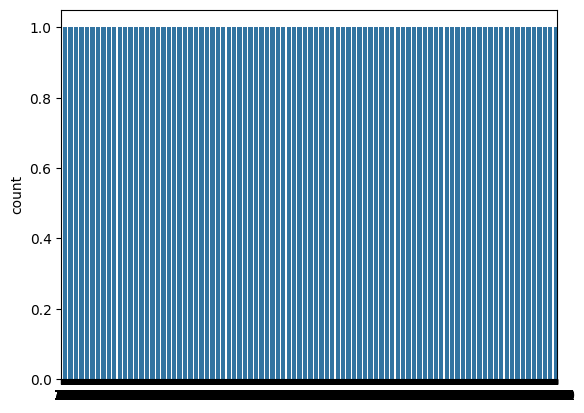

In [36]:
sns.countplot(df['Outlet_Establishment_Year'])

<Axes: xlabel='count', ylabel='Outlet_Size'>

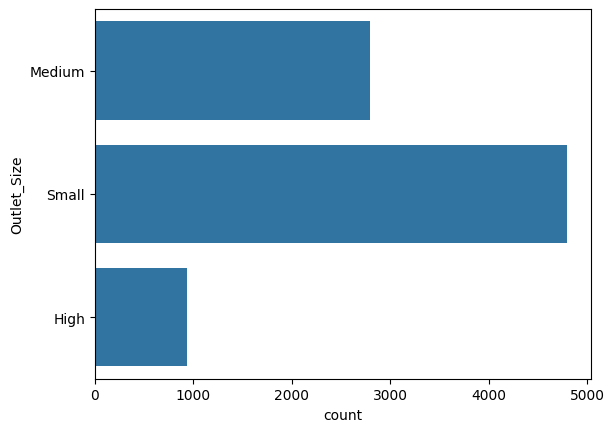

In [37]:
sns.countplot(df['Outlet_Size'])

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

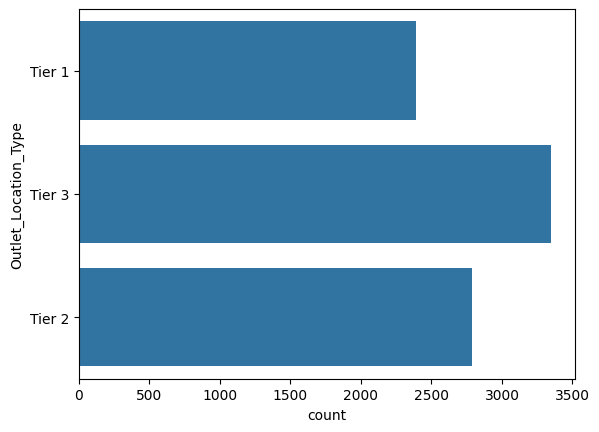

In [38]:
sns.countplot(df['Outlet_Location_Type'])

<Axes: xlabel='count', ylabel='Outlet_Type'>

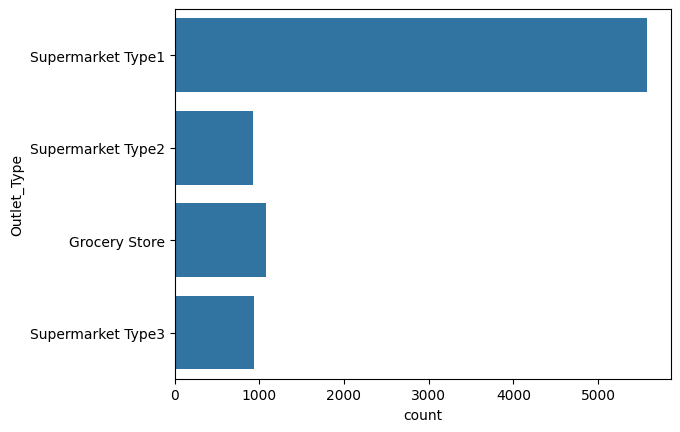

In [39]:
sns.countplot(df['Outlet_Type'])

## Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## Onehot Encoding

In [41]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,False,False,True,False,True,False,False,False,False,True


## Input Split

In [42]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

## Model Training

# 1st solution

In [43]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
# def train(model, X, y):
#     # train the model
#     model.fit(X, y)
    
#     # predict the training set
#     pred = model.predict(X)
    
#     # perform cross-validation
#     cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
#     cv_score = np.abs(np.mean(cv_score))
    
#     print("Model Report")
#     print("MSE:",mean_squared_error(y,pred))
#     print("CV Score:", cv_score)

In [44]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# model = LinearRegression(normalize=True)
# train(model, X, y)
# coef = pd.Series(model.coef_, X.columns).sort_values()
# coef.plot(kind='bar', title="Model Coefficients")

# 2nd solution

In [45]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# # Assuming X and y are your features and target variable
# # Replace this with your actual data
# # X, y = ...

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# def train(model, X_train, y_train, X_test, y_test):
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on the training set
#     pred_train = model.predict(X_train)
    
#     # Predict on the testing set
#     pred_test = model.predict(X_test)
    
#     # Calculate and print training metrics
#     mse_train = mean_squared_error(y_train, pred_train)
#     print("Training MSE:", mse_train)
    
#     # Calculate and print testing metrics
#     mse_test = mean_squared_error(y_test, pred_test)
#     print("Testing MSE:", mse_test)
    
#     # Perform cross-validation on the training set
#     cv_score = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#     print("CV Score:", np.mean(cv_score))

# # Create a pipeline with StandardScaler and LinearRegression
# model = make_pipeline(StandardScaler(), LinearRegression())

# # Train and evaluate the model
# train(model, X_train, y_train, X_test, y_test)


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib
import os

# Assuming X and y are your features and target variable
# Replace this with your actual data
# X, y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_save(model, X_train, y_train, X_test, y_test, model_filename):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    pred_train = model.predict(X_train)
    
    # Predict on the testing set
    pred_test = model.predict(X_test)
    
    # Calculate and print training metrics
    mse_train = mean_squared_error(y_train, pred_train)
    print("Training MSE:", mse_train)
    
    # Calculate and print testing metrics
    mse_test = mean_squared_error(y_test, pred_test)
    print("Testing MSE:", mse_test)
    
    # Perform cross-validation on the training set
    cv_score = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    print("CV Score:", np.mean(cv_score))
    
    # Save the trained model to a file
    model_path = os.path.join("models", model_filename)
    joblib.dump(model, model_path)
    print(f"Model saved to {model_path}")

# Create a pipeline with StandardScaler and LinearRegression
model = make_pipeline(StandardScaler(), LinearRegression())

# Train, evaluate, and save the model
train_and_save(model, X_train, y_train, X_test, y_test, 'linear_regression_model.pkl')


Training MSE: 0.28941490400678166
Testing MSE: 0.2839004934344224
CV Score: 0.2903238340373869
Model saved to models\linear_regression_model.pkl


1. Training MSE (Mean Squared Error): This metric measures the average squared difference between the actual and predicted values on the training dataset. A lower MSE indicates better performance; it quantifies the model's accuracy on data it was trained on.

2. Testing MSE (Mean Squared Error): Similar to Training MSE, this metric calculates the average squared difference between actual and predicted values on the testing dataset (unseen data). It assesses how well the model generalizes to new, unseen data. Ideally, it should be close to the training MSE.

3. CV Score (Cross-Validation Score): This represents the average negative mean squared error (MSE) across different folds in the cross-validation process. It assesses how well the model generalizes to new, unseen data by evaluating it on multiple subsets of the training data. Lower values indicate better performance.

##### Testing MSE of 0.284 indicates that the model isn't drastically overfitting and performs reasonably well on unseen data.
##### The CV Score is 0.290, which aligns with the Training and Testing MSE values. This consistency across training, testing, and cross-validation indicates that the model generalizes well and doesn't suffer from significant overfitting or underfitting issues.

#### Decision Tree

In [47]:
# # from sklearn.tree import DecisionTreeRegressor
# # model = DecisionTreeRegressor()
# # train(model, X_test, y_test)
# # coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
# # coef.plot(kind='bar', title="Feature Importance")

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split

# # Assuming X and y are your features and target variable
# # Replace this with your actual data
# # X, y = ...

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# def train(model, X_train, y_train, X_test, y_test):
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on the testing set
#     pred_test = model.predict(X_test)
    
#     # Calculate and print testing metrics
#     mse_test = mean_squared_error(y_test, pred_test)
#     print("Testing MSE:", mse_test)

# # Create a DecisionTreeRegressor model
# model = DecisionTreeRegressor()

# # Train and evaluate the model
# train(model, X_train, y_train, X_test, y_test)


#### Randmon Forest

In [48]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import pickle
# import numpy as np

# # Assuming X and y are your features and target variable
# # Replace this with your actual data
# # X, y = ...

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# def train_and_save_pickle(model, X_train, y_train, X_test, y_test, filename):
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on the testing set
#     pred_test = model.predict(X_test)
    
#     # Calculate and print testing metrics
#     mse_test = mean_squared_error(y_test, pred_test)
#     print("Testing MSE:", mse_test)
    
#     # Save the trained model to a file using pickle
#     with open(filename, 'wb') as file:
#         pickle.dump(model, file)
#     print(f"Model saved to {filename}")

# # # Create a RandomForestRegressor model
# # randomforestmodel = RandomForestRegressor()

# # # Train, evaluate, and save the model using pickle
# # train_and_save_pickle(randomforestmodel, X_train, y_train, X_test, y_test, 'randomforest_model.pkl')

# # # Load the saved model using pickle
# # with open('randomforest_model.pkl', 'rb') as file:
# #     loaded_model = pickle.load(file)

# # # Now you can use loaded_model for predictions without retraining



# import joblib

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a RandomForestRegressor model
# randomforestmodel = RandomForestRegressor()

# # Train the model
# randomforestmodel.fit(X_train, y_train)

# # Save the model with the appropriate protocol version
# joblib.dump(randomforestmodel, 'models/randomforest_model.pkl', protocol=4)

# # Load the model
# loaded_model = joblib.load('models/randomforest_model.pkl')